In [1]:
# Mount driver colab

path_mount = '/content/drive/'

from google.colab import drive
drive.mount(path_mount)

Mounted at /content/drive/


In [2]:
from typing import Any, List, Tuple
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc 

In [3]:
# Environment Variable

path_base = '/content/drive/My Drive/Classroom/PDI/Projeto_AB2.2'
path_imgs = 'segimage-pdi/imgs'

In [4]:
# Load directory

os.chdir(path_base)
os.listdir()

['segimage-pdi', 'SegImage_PDI-AB2.2.ipynb']

In [5]:
# Repositório do Projeto: <https://github.com/jytaloramon/segimage-pdi.git>
# Executar para baixar as imagens de teste

!git clone https://github.com/jytaloramon/segimage-pdi.git

fatal: destination path 'segimage-pdi' already exists and is not an empty directory.


### Declarações

In [6]:
# Classe de Segmentação

class SegImageGrowing:

    def __init__(self, image: List[List[int]]) -> None:

        self._image = np.array(image, np.float32)
        self._shape = self._image.shape
        self._image_avg_global = np.average(image)

    def run_segmentation(self, seed_start_posi: Tuple[int, int], seed_start_color: int, target: int) -> Tuple[Any,  List[Tuple[int, int, int]]]:

        img_out = np.zeros(self._shape, dtype=np.float32)

        queue: List[Tuple[int, int, int, int]] = [
            (seed_start_posi[0], seed_start_posi[1], seed_start_color, self._image[1][1])]

        neighborhood: List[Tuple[int, int]] = [(-1, -1), (-1, 0), (-1, 1), (1, -1),
                                               (1, 0), (1, 1), (0, -1), (0, 1)]

        event_queue: List[Tuple[int, int, int]] = [
            (seed_start_posi[0], seed_start_posi[1], seed_start_color)]

        img_out[seed_start_posi[0]][seed_start_posi[1]] = seed_start_color
        while len(queue) > 0:
            l, c, i, b = queue.pop(0)

            for l_add, c_add in neighborhood:
                next_l, next_c = l + l_add, c + c_add

                if self._is_valid_pixel(next_l, next_c) and img_out[next_l][next_c] == 0:
                    if abs(b - self._image[next_l][next_c]) <= target:
                        img_out[next_l][next_c] = i
                        queue.append((next_l, next_c, i, b))
                        event_queue.append((next_l, next_c, i))
                    else:
                        new_i = 255 if i == 1 else 1
                        img_out[next_l][next_c] = new_i
                        queue.append(
                            (next_l, next_c, new_i, self._image[next_l][next_c]))
                        event_queue.append((next_l, next_c, i))

        return img_out, event_queue

    def _is_valid_pixel(self, l: int, c: int) -> bool:

        return not(l < 0 or c < 0 or l >= self._shape[0] or c >= self._shape[1])

In [7]:
def start_animation(shape, event_arr:List[Tuple[int, int, int]]):
  mt_ani = [[0 for _ in range(shape[1])] for _ in range(shape[0])]

  fig = plt.figure()

  l = plt.imshow(mt_ani, cmap='gray', vmin=0, vmax=255)

  def updatefig(k):
    line, col, v = event_arr[k]
    
    mt_ani[line][col] = v

    l.set_array(mt_ani)
    return [l]

  ani = animation.FuncAnimation(fig, updatefig, frames=len(event_arr), interval=50, blit=True)
  rc('animation', html='jshtml')
  ani

In [19]:
def main_seg_image(name:str,  
                   init_pixel:Tuple[int, int],
                   v_init:int,
                   target:int,
                   with_simulation:bool
)->None:

  img_original = cv2.imread(f'{path_imgs}/{name}')
  img_original_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
  
  img = img_original_gray

  seg_growing = SegImageGrowing(img)

  img_seg, events_seg = seg_growing.run_segmentation(init_pixel, v_init, target)

  print('- (1) Imagem Original (Colorida).')
  print('- (2) Imagem Original em Escala de Cinza (imagem usada)')
  print('- (3) Segmentação', end='\n\n')

  figsize = (15, 15)
  fig = plt.figure(figsize=figsize)
  fig.add_subplot(311).imshow(img_original, vmin=0, vmax=255)
  fig.add_subplot(312).imshow(img, cmap='gray', vmin=0, vmax=255)
  fig.add_subplot(313).imshow(img_seg, cmap='gray', vmin=0, vmax=255)
  fig.show()

  if with_simulation:
    start_animation(img_seg.shape, events_seg)

  #cv2.imwrite('imgs/out.jpg', img_seg)

### Execução

- (1) Imagem Original (Colorida).
- (2) Imagem Original em Escala de Cinza (imagem usada)
- (3) Segmentação



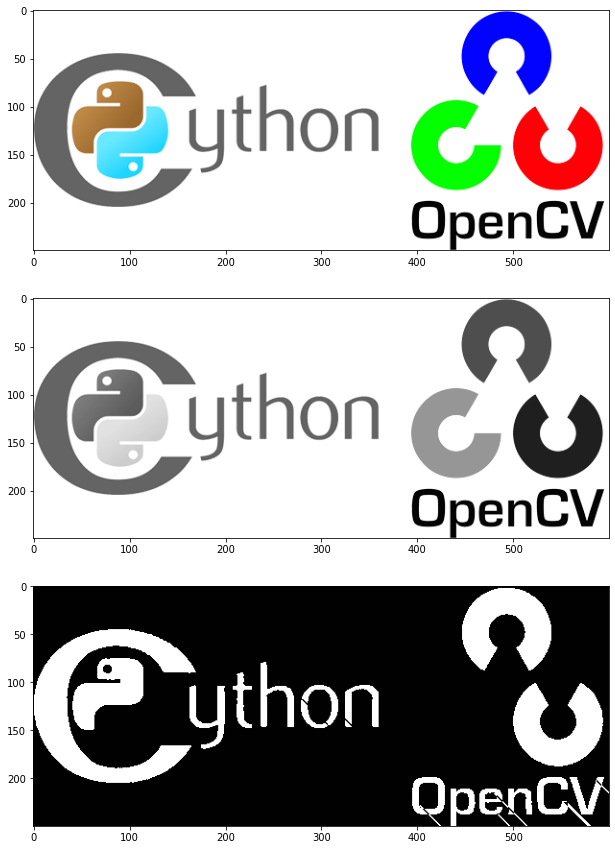

In [20]:
main_seg_image('opencvpy.png', (100, 50), 1, 120, False)

- (1) Imagem Original (Colorida).
- (2) Imagem Original em Escala de Cinza (imagem usada)
- (3) Segmentação



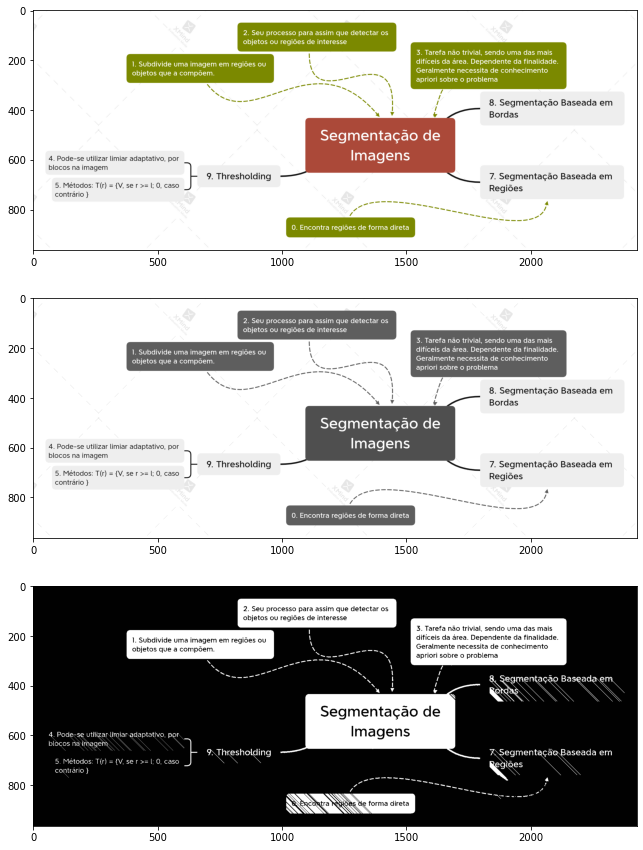

In [21]:
main_seg_image('xmind.png', (1, 1), 1, 130, False)

- (1) Imagem Original (Colorida).
- (2) Imagem Original em Escala de Cinza (imagem usada)
- (3) Segmentação



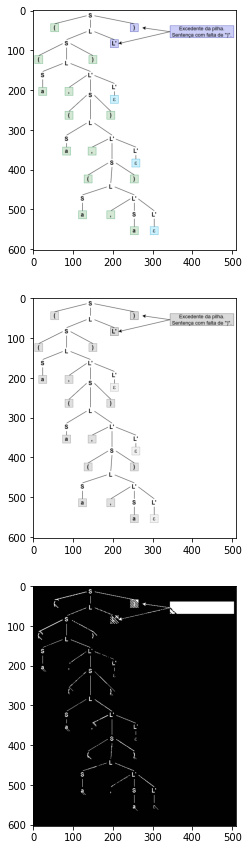

In [22]:
main_seg_image('tree.png', (1, 1), 1, 130, False)

- (1) Imagem Original (Colorida).
- (2) Imagem Original em Escala de Cinza (imagem usada)
- (3) Segmentação



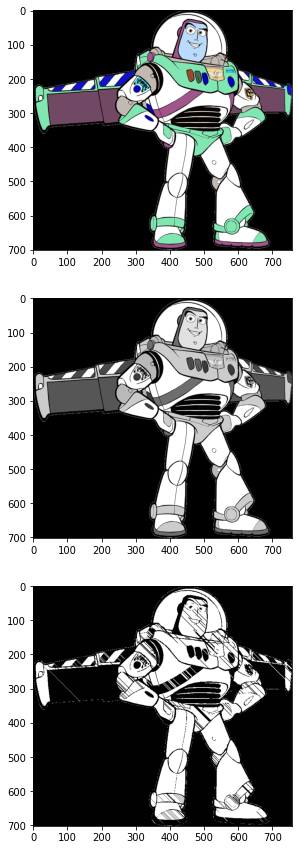

In [23]:
main_seg_image('buzz.png', (1, 1), 1, 150, False)

- (1) Imagem Original (Colorida).
- (2) Imagem Original em Escala de Cinza (imagem usada)
- (3) Segmentação



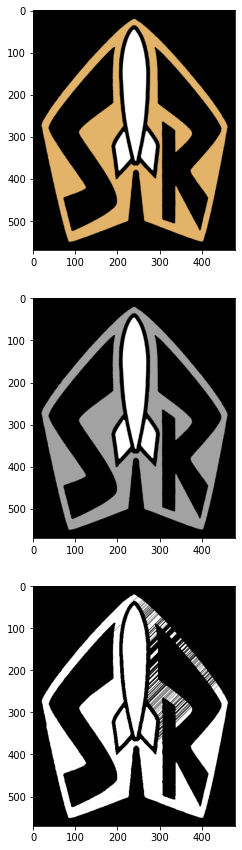

In [24]:
main_seg_image('sr.png', (500, 200), 1, 150, False)

- (1) Imagem Original (Colorida).
- (2) Imagem Original em Escala de Cinza (imagem usada)
- (3) Segmentação



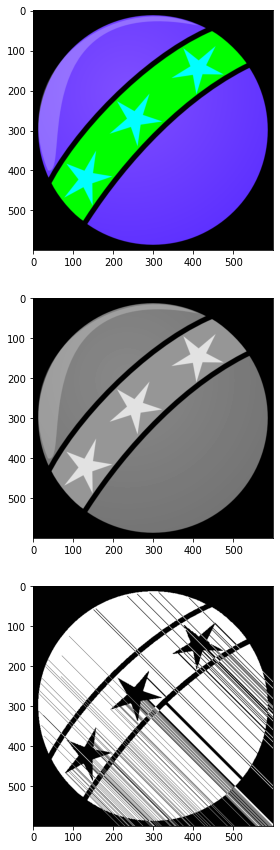

In [25]:
main_seg_image('ball.png', (1, 1), 1, 75, False)